In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('..\\Data\\cleaned_df.csv')
print(df.head())

C:\Users\hp\AppData\Local\Temp\ipykernel_10504\337653329.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..\\Data\\cleaned_df.csv')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [17]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.488056e+07,2.010225e+03,4.046616e+00,2.466869e+03,9.721553e+01,4.019239e+00,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360059e+07,3.261391e+00,2.939410e-01,4.427106e+02,1.939061e+01,4.681854e-01,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


# Questions

1. What is the overall Loss Ratio (TotalClaims / TotalPremium) for the portfolio? 
2. How does it vary by Province, VehicleType, and Gender?

In [18]:
df['TotalClaims'].unique()

array([     0.        ,   2294.09649123,   2040.47368421, ...,
       101812.51754386, 155317.57894737,  28903.85087719], shape=(1615,))

In [19]:
df[['TotalClaims', 'TotalPremium']].head()

,TotalClaims,TotalPremium
0,0.0,21.929825
1,0.0,21.929825
2,0.0,0.000000
3,0.0,512.848070
4,0.0,0.000000


In [6]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}")


Overall Loss Ratio: 1.05


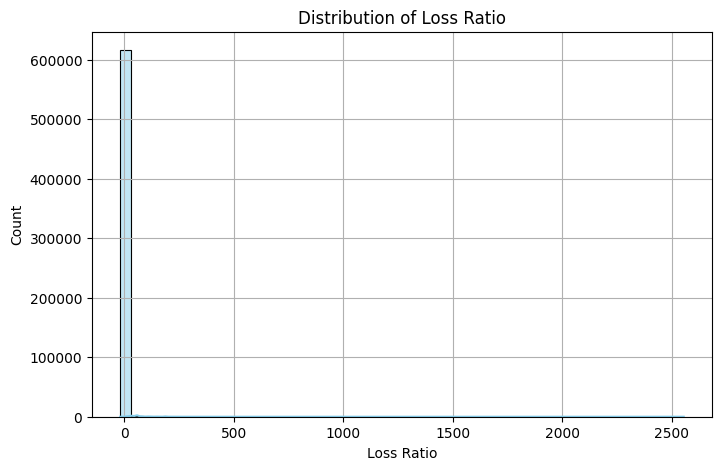

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['LossRatio'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Loss Ratio')
plt.xlabel('Loss Ratio')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## By Province

C:\Users\hp\AppData\Local\Temp\ipykernel_5568\4025735874.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_by_province = df.groupby('Province').apply(


Province
Gauteng          1.222018
KwaZulu-Natal    1.082693
Western Cape     1.059472
North West       0.790367
Mpumalanga       0.720897
Free State       0.680758
Limpopo          0.661199
Eastern Cape     0.633813
Northern Cape    0.282699
dtype: float64


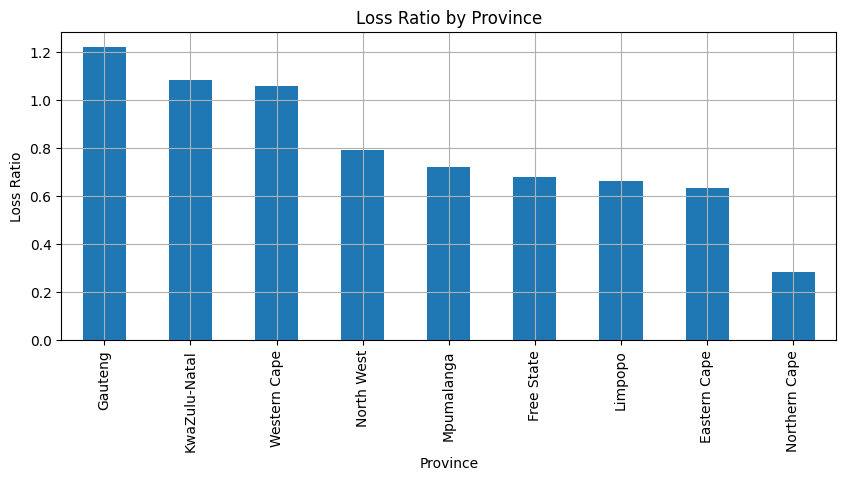

In [22]:
loss_by_province = df.groupby('Province').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].replace(0, np.nan).sum()
).sort_values(ascending=False)

print(loss_by_province)

# Optional plot
loss_by_province.plot(kind='bar', figsize=(10, 4), title='Loss Ratio by Province')
plt.ylabel('Loss Ratio')
plt.grid(True)
plt.show()


INSIGHT : 
- Gauteng, KwaZulu-Natal, Western Cape have loss ratios above 1, meaning claims paid are higher than premiums collected in these provinces. This indicates underwriting losses or maybe higher claims frequency/severity there.

- Other provinces are below 1, indicating profitability.

- Northern Cape has a very low loss ratio (0.28), meaning the insurer pays very little in claims compared to premiums — highly profitable, or possibly less risk exposure or under-claiming.

Possible actions
Investigate why Gauteng and some provinces have high loss ratios:

Are claims unusually high?

Are premiums too low?

Is there fraud or operational inefficiency?

Adjust pricing, underwriting, or risk management strategies per province.

## By Vehicle Type

C:\Users\hp\AppData\Local\Temp\ipykernel_5568\1706067103.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_by_vehicle_type = df.groupby('VehicleType').apply(


VehicleType
Heavy Commercial     1.628112
Medium Commercial    1.050251
Passenger Vehicle    1.047538
Light Commercial     0.232066
Bus                  0.137292
dtype: float64


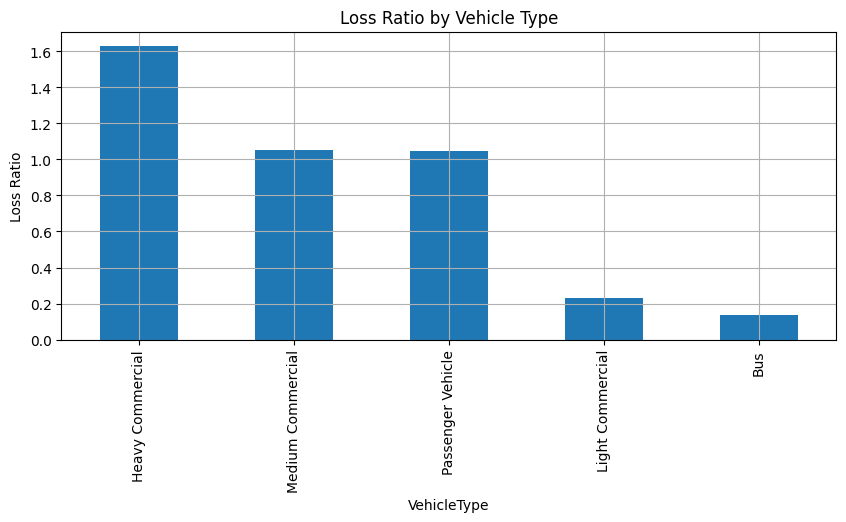

In [23]:
loss_by_vehicle_type = df.groupby('VehicleType').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].replace(0, np.nan).sum()
).sort_values(ascending=False)

print(loss_by_vehicle_type)

# Optional plot
loss_by_vehicle_type.plot(kind='bar', figsize=(10, 4), title='Loss Ratio by Vehicle Type')
plt.ylabel('Loss Ratio')
plt.grid(True)
plt.show()

INSIGHT 2
 Insights from your data
 
🔴 Heavy Commercial Vehicles: A loss ratio of 1.63 is alarming. The company is paying out 63% more in claims than collecting in premiums — this segment is bleeding money.

🟠 Medium Commercial & Passenger Vehicles: Slightly unprofitable but can be improved by better pricing or claim control.

🟢 Light Commercial & Buses: These are very profitable — the insurer retains most of the premium.

 Recommendations
Investigate Heavy Commercial Vehicles:

Are there high-severity claims?

Are premiums too low?

Is there poor underwriting or fraud?

Review pricing models for Medium Commercial and Passenger Vehicles.

Protect profitable segments (Light Commercial, Buses) — consider incentivizing them, but monitor for adverse selection.

## By Gender

C:\Users\hp\AppData\Local\Temp\ipykernel_5568\3813001228.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_by_Gender = df.groupby('Gender').apply(


Gender
Not specified    1.053204
Male             0.883910
Female           0.821879
dtype: float64


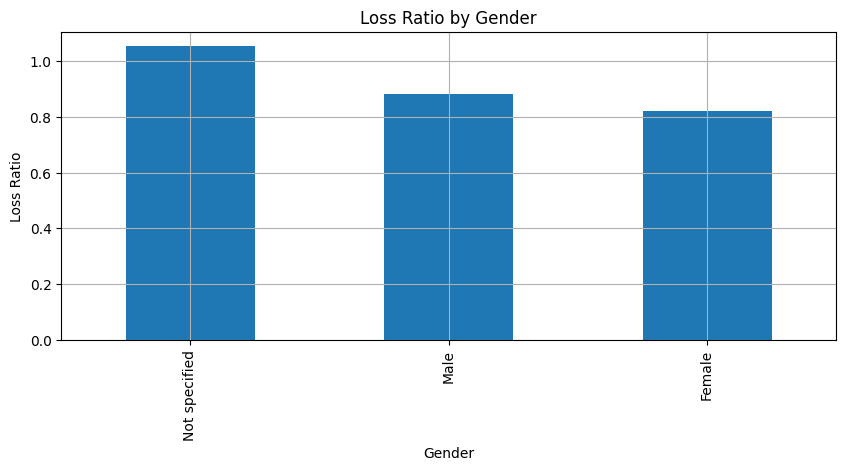

In [24]:
loss_by_Gender = df.groupby('Gender').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].replace(0, np.nan).sum()
).sort_values(ascending=False)

print(loss_by_Gender)

# Optional plot
loss_by_Gender.plot(kind='bar', figsize=(10, 4), title='Loss Ratio by Gender')
plt.ylabel('Loss Ratio')
plt.grid(True)
plt.show()

## Question 2

1. What are the distributions of key financial variables? 
2. Are there outliers in TotalClaims or CustomValueEstimate that could skew our analysis?

In [25]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio'],
      dtype='object')

In [7]:
financial_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CapitalOutstanding', 'LossRatio']

# Clean and convert columns
for col in financial_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').str.replace(' ', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

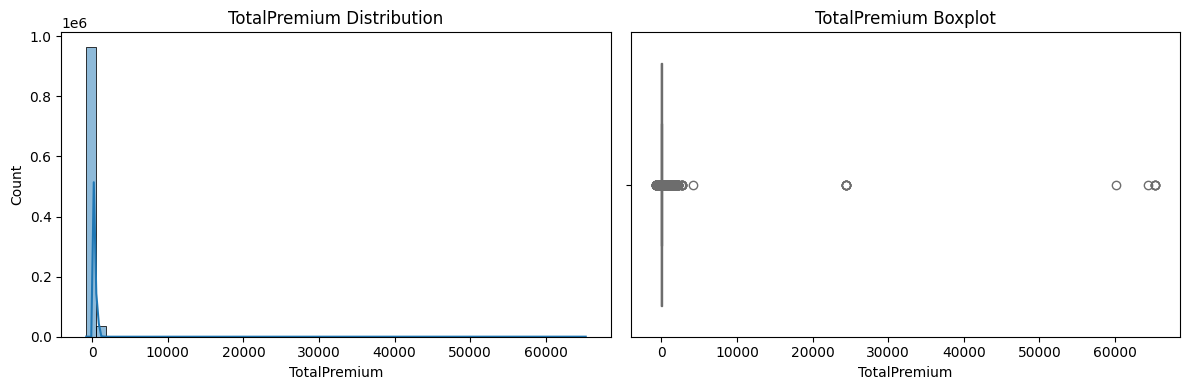

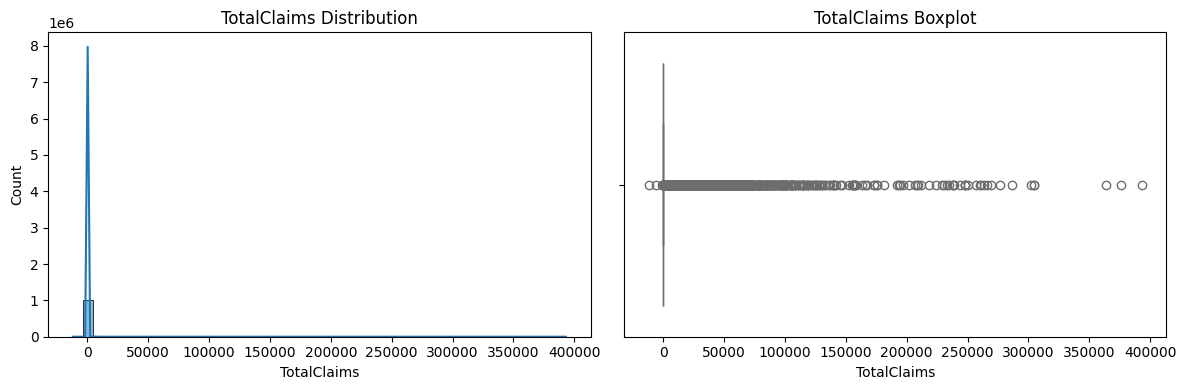

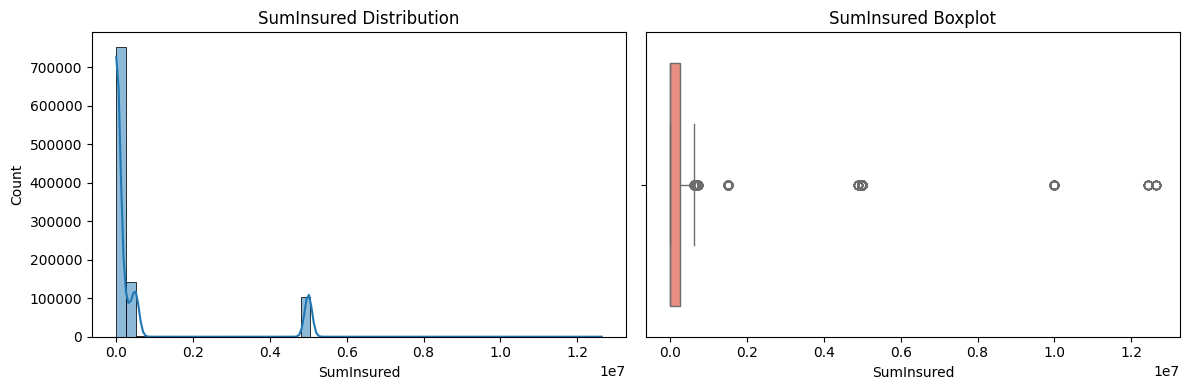

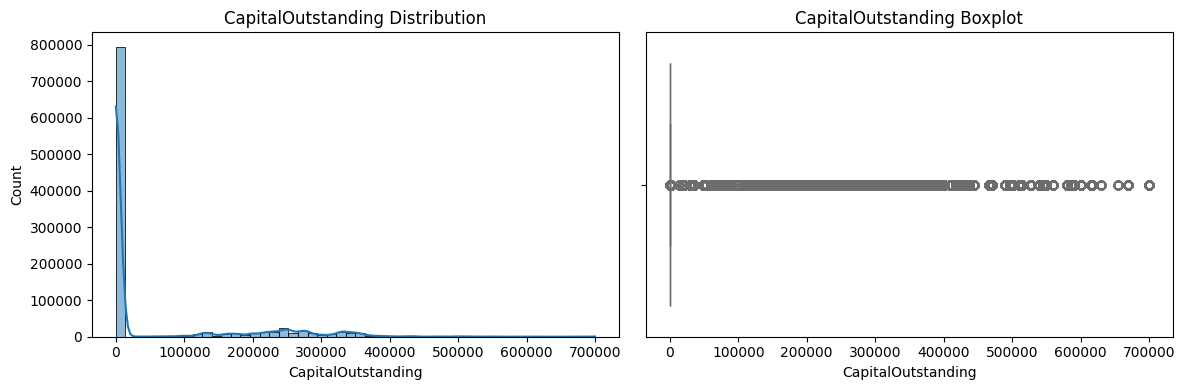

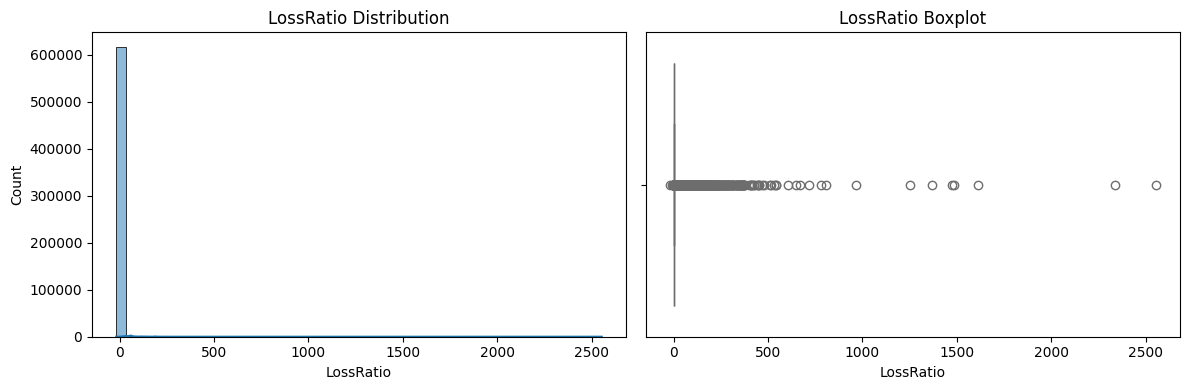

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of financial columns to analyze
financial_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CapitalOutstanding', 'LossRatio']

# Plot histogram + boxplot for each
for col in financial_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(df[col].dropna(), bins=50, ax=ax[0], kde=True)
    ax[0].set_title(f'{col} Distribution')
    
    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=ax[1], color='salmon')
    ax[1].set_title(f'{col} Boxplot')
    
    plt.tight_layout()
    plt.show()

# Question 3

1. Are there temporal trends? 
2. Did the claim frequency or severity change over the 18-month period?

In [9]:
# change to date format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

In [10]:
# Group by month
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalClaims': ['sum', 'count'],
    'TotalPremium': 'sum'
})

# Rename columns
monthly.columns = ['TotalClaimsSum', 'ClaimCount', 'TotalPremiumSum']
monthly.index = monthly.index.to_timestamp()  

# Calculate metrics
monthly['ClaimFrequency'] = monthly['ClaimCount']
monthly['ClaimSeverity'] = monthly['TotalClaimsSum'] / monthly['ClaimCount']
monthly['MonthlyLossRatio'] = monthly['TotalClaimsSum'] / monthly['TotalPremiumSum']


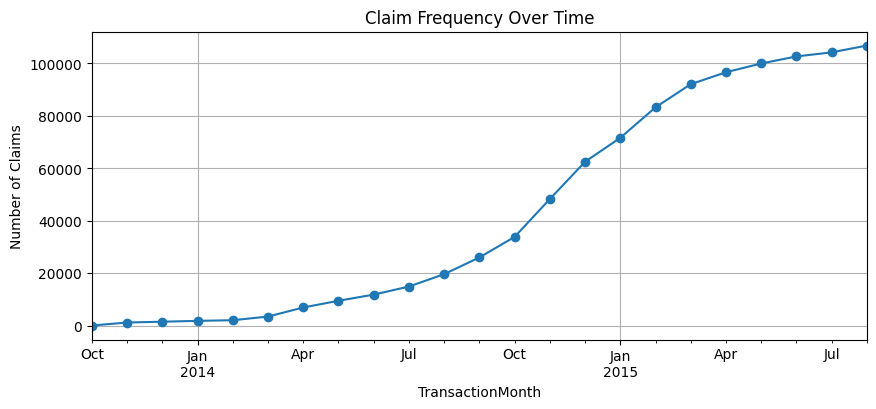

In [11]:
# Claim Frequency Over Time
monthly['ClaimFrequency'].plot(marker='o', figsize=(10, 4), title='Claim Frequency Over Time')
plt.ylabel('Number of Claims')
plt.grid(True)
plt.show()

INSIGHT
- More claims filed — possibly due to seasonal or environmental events

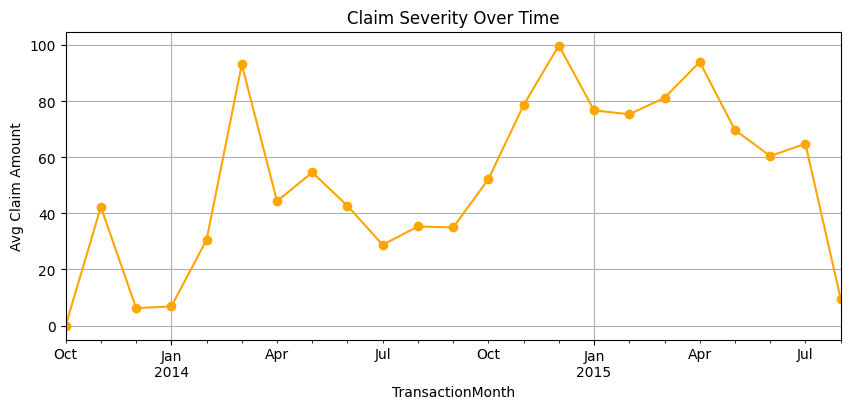

In [12]:
# Claim Severity Over Time
monthly['ClaimSeverity'].plot(marker='o', color='orange', figsize=(10, 4), title='Claim Severity Over Time')
plt.ylabel('Avg Claim Amount')
plt.grid(True)
plt.show()

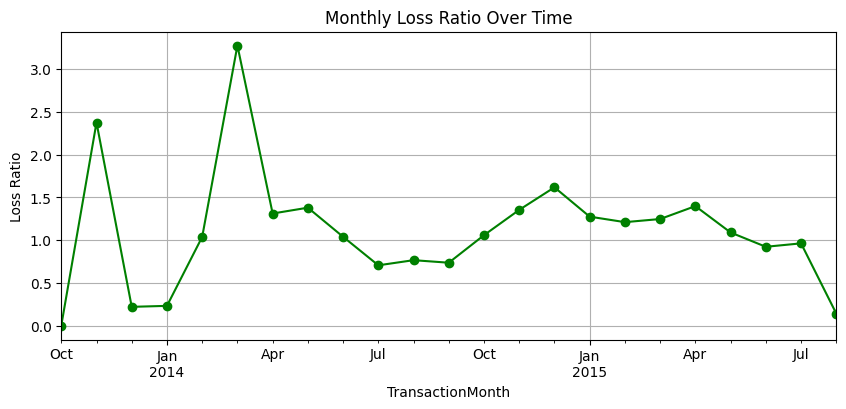

In [13]:
# Monthly Loss Ratio Over Time
monthly['MonthlyLossRatio'].plot(marker='o', color='green', figsize=(10, 4), title='Monthly Loss Ratio Over Time')
plt.ylabel('Loss Ratio')
plt.grid(True)
plt.show()

# Question 4

1. Which vehicle makes/models are associated with the highest and lowest claim amounts?

In [ ]:
# Groupping
claims_by_vehicle = df.groupby(['make', 'Model'])['TotalClaims'].sum().reset_index()

# Sortting 
top_claims = claims_by_vehicle.sort_values('TotalClaims', ascending=False).head(10)
bottom_claims = claims_by_vehicle[claims_by_vehicle['TotalClaims'] > 0].sort_values('TotalClaims').head(10)


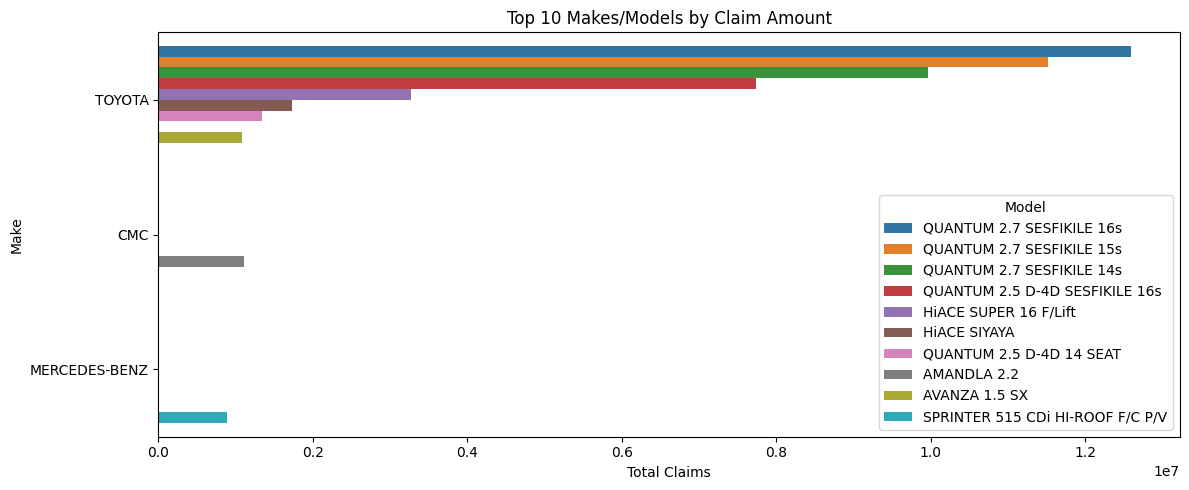

In [15]:
plt.figure(figsize=(12, 5))
sns.barplot(x='TotalClaims', y='make', data=top_claims, hue='Model')
plt.title('Top 10 Makes/Models by Claim Amount')
plt.xlabel('Total Claims')
plt.ylabel('Make')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


INSIGHT
- Toyota car are getting more claims.